In [165]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ppca import PPCA
from bpca import BPCA
from pca_all_impute import PCAImputer

## 10-5-Gaussian

In [166]:
cov1 = np.diag(np.array([5,4,3,2,1,0.5,0.5,0.5,0.5,0.5])**2)
data1 = np.random.multivariate_normal(np.zeros(10), cov1, size=1000)
mask_missing1 = np.random.choice(2, size=data1.shape, p=[0.9,0.1])
data_missing1 = data1.copy()
data_missing1[np.where(mask_missing1)] = np.nan

In [156]:
pca_imputer1 = PCAImputer(n_dimension=5)
data_pca_imputed1, mse_pca1 = pca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data1, n_iteration=100)
ppca_imputer1 = PCAImputer('ppca', n_dimension=5)
data_ppca_imputed1, mse_ppca1 = ppca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data1, n_iteration=1500)
bpca_imputer1 = PCAImputer('bpca')
data_bpca_imputed1, mse_bpca1 = bpca_imputer1.fit_transform(data_missing1, verbose=True, trace_mse=True, cdata=data1, n_iteration=700)

Iter 0, MSE=5.929203
Iter 10, MSE=5.934266
Iter 20, MSE=5.960975
Iter 30, MSE=6.013291
Iter 40, MSE=6.091034
Iter 50, MSE=6.189119
Iter 60, MSE=6.301135
Iter 70, MSE=6.422054
Iter 80, MSE=6.548811
Iter 90, MSE=6.679847
Iter 0, MSE=5.868102
Iter 10, MSE=5.725398
Iter 20, MSE=5.680552
Iter 30, MSE=5.654249
Iter 40, MSE=5.636720
Iter 50, MSE=5.624175
Iter 60, MSE=5.614765
Iter 70, MSE=5.607466
Iter 80, MSE=5.601658
Iter 90, MSE=5.596942
Iter 100, MSE=5.593047
Iter 110, MSE=5.589785
Iter 120, MSE=5.587023
Iter 130, MSE=5.584660
Iter 140, MSE=5.582623
Iter 150, MSE=5.580854
Iter 160, MSE=5.579310
Iter 170, MSE=5.577956
Iter 180, MSE=5.576762
Iter 190, MSE=5.575707
Iter 200, MSE=5.574771
Iter 210, MSE=5.573938
Iter 220, MSE=5.573195
Iter 230, MSE=5.572530
Iter 240, MSE=5.571935
Iter 250, MSE=5.571401
Iter 260, MSE=5.570920
Iter 270, MSE=5.570487
Iter 280, MSE=5.570096
Iter 290, MSE=5.569743
Iter 300, MSE=5.569423
Iter 310, MSE=5.569134
Iter 320, MSE=5.568871
Iter 330, MSE=5.568632
Iter 340, 

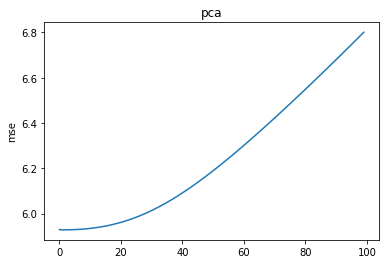

In [184]:
plt.plot(np.arange(100), mse_pca1)
plt.title('pca')
plt.ylabel('mse')
plt.show()

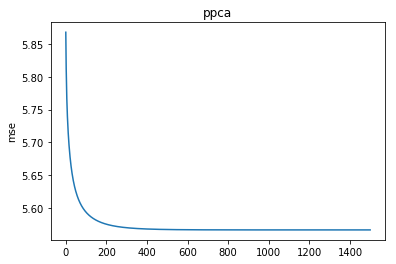

In [183]:
plt.plot(np.arange(1500), mse_ppca1)
plt.title('ppca')
plt.ylabel('mse')
plt.show()

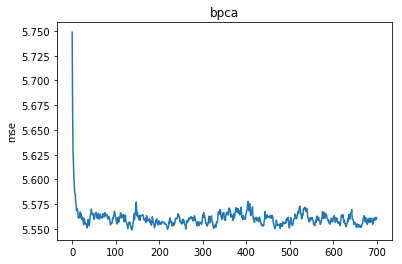

In [185]:
plt.plot(np.arange(700), mse_bpca1)
plt.title('bpca')
plt.ylabel('mse')
plt.show()

## 10-5-MLP

In [167]:
# 10-50-10

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def relu(x):
    return x * (x > 0)

def sample_W(sizes):
    sizes = sizes
    weights = []
    for i in range(1, len(sizes)):
        n_in = sizes[i-1]
        n_out = sizes[i]
        W = np.random.normal(loc=0, scale=np.sqrt(2/(n_in+n_out)), size=(n_in*n_out))
        b = np.zeros(n_out)
        weights.append(W)
        weights.append(b)
    return np.hstack(weights)

def mlp(X, W, sizes):
    i = 0
    net = None
    for l1, l2 in zip(sizes[:-1], sizes[1:]):
        net = X if net is None else relu(net)
        w = W[i:i+l1*l2].reshape(l1,l2); i += l1*l2
        b = W[i:i+l2]; i += l2
        net = np.dot(net, w) + b
    return net
    
sizes=[10,50,10]
w = sample_W(sizes)
data2 = mlp(data1, w, sizes)
mask_missing2 = np.random.choice(2, size=data2.shape, p=[0.9,0.1])
data_missing2 = data2.copy()
data_missing2[np.where(mask_missing2)] = np.nan

In [168]:
pca_imputer2 = PCAImputer(n_dimension=5)
data_pca_imputed2, mse_pca2 = pca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data2, n_iteration=3000)
ppca_imputer2 = PCAImputer('ppca', n_dimension=5)
data_ppca_imputed2, mse_ppca2 = ppca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data2, n_iteration=500)
bpca_imputer2 = PCAImputer('bpca')
data_bpca_imputed2, mse_bpca2 = bpca_imputer2.fit_transform(data_missing2, verbose=True, trace_mse=True, cdata=data2, n_iteration=500)

Iter 0, MSE=1.123899
Iter 10, MSE=0.353940
Iter 20, MSE=0.372638
Iter 30, MSE=0.391437
Iter 40, MSE=0.402426
Iter 50, MSE=0.408953
Iter 60, MSE=0.413100
Iter 70, MSE=0.415946
Iter 80, MSE=0.418050
Iter 90, MSE=0.419716
Iter 100, MSE=0.421113
Iter 110, MSE=0.422341
Iter 120, MSE=0.423458
Iter 130, MSE=0.424498
Iter 140, MSE=0.425483
Iter 150, MSE=0.426425
Iter 160, MSE=0.427331
Iter 170, MSE=0.428206
Iter 180, MSE=0.429053
Iter 190, MSE=0.429872
Iter 200, MSE=0.430664
Iter 210, MSE=0.431430
Iter 220, MSE=0.432171
Iter 230, MSE=0.432886
Iter 240, MSE=0.433577
Iter 250, MSE=0.434242
Iter 260, MSE=0.434884
Iter 270, MSE=0.435502
Iter 280, MSE=0.436097
Iter 290, MSE=0.436670
Iter 300, MSE=0.437221
Iter 310, MSE=0.437750
Iter 320, MSE=0.438260
Iter 330, MSE=0.438749
Iter 340, MSE=0.439220
Iter 350, MSE=0.439672
Iter 360, MSE=0.440107
Iter 370, MSE=0.440525
Iter 380, MSE=0.440927
Iter 390, MSE=0.441313
Iter 400, MSE=0.441685
Iter 410, MSE=0.442043
Iter 420, MSE=0.442388
Iter 430, MSE=0.442720

Iter 10, MSE=1.038232
Iter 20, MSE=1.025677
Iter 30, MSE=1.034483
Iter 40, MSE=1.037354
Iter 50, MSE=1.027843
Iter 60, MSE=1.026052
Iter 70, MSE=1.030428
Iter 80, MSE=1.029929
Iter 90, MSE=1.037267
Iter 100, MSE=1.028287
Iter 110, MSE=1.028378
Iter 120, MSE=1.031638
Iter 130, MSE=1.034687
Iter 140, MSE=1.029775
Iter 150, MSE=1.030502
Iter 160, MSE=1.038265
Iter 170, MSE=1.033014
Iter 180, MSE=1.034799
Iter 190, MSE=1.027214
Iter 200, MSE=1.029613
Iter 210, MSE=1.034405
Iter 220, MSE=1.028138
Iter 230, MSE=1.026608
Iter 240, MSE=1.032245
Iter 250, MSE=1.039082
Iter 260, MSE=1.035482
Iter 270, MSE=1.033110
Iter 280, MSE=1.032679
Iter 290, MSE=1.033426
Iter 300, MSE=1.036120
Iter 310, MSE=1.053383
Iter 320, MSE=1.036254
Iter 330, MSE=1.033349
Iter 340, MSE=1.029626
Iter 350, MSE=1.041656
Iter 360, MSE=1.028670
Iter 370, MSE=1.033146
Iter 380, MSE=1.040344
Iter 390, MSE=1.033543
Iter 400, MSE=1.027567
Iter 410, MSE=1.029840
Iter 420, MSE=1.048694
Iter 430, MSE=1.034544
Iter 440, MSE=1.0359

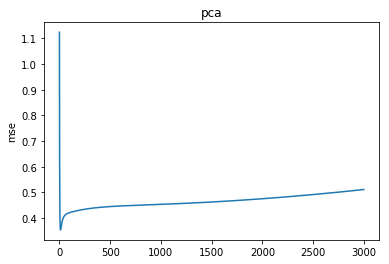

In [187]:
plt.plot(np.arange(3000), mse_pca2)
plt.title('ppca')
plt.ylabel('mse')
plt.show()

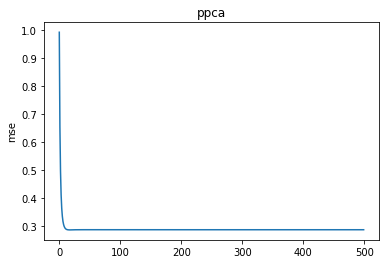

In [188]:
plt.plot(np.arange(500), mse_ppca2)
plt.title('ppca')
plt.ylabel('mse')
plt.show()

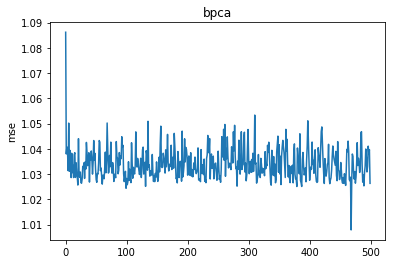

In [186]:
plt.plot(np.arange(500), mse_bpca2)
plt.title('bpca')
plt.ylabel('mse')
plt.show()

## 100-10-Gaussian

In [192]:
cov3 = np.diag(np.hstack((np.arange(10, 0, -1), 0.1 * np.ones(90))))
data3 = np.random.multivariate_normal(np.zeros(100), cov3, size=100)
mask_missing3 = np.random.choice(2, size=data3.shape, p=[0.9,0.1])
data_missing3 = data3.copy()
data_missing3[np.where(mask_missing3)] = np.nan

In [193]:
pca_imputer3 = PCAImputer(n_dimension=5)
data_pca_imputed3, mse_pca3 = pca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data3, n_iteration=1000)
ppca_imputer3 = PCAImputer('ppca', n_dimension=5)
data_ppca_imputed3, mse_ppca3 = ppca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)
bpca_imputer3 = PCAImputer('bpca')
data_bpca_imputed3, mse_bpca3 = bpca_imputer3.fit_transform(data_missing3, verbose=True, trace_mse=True, cdata=data3, n_iteration=500)

Iter 0, MSE=5.546969
Iter 10, MSE=10.565047
Iter 20, MSE=16.084406
Iter 30, MSE=20.510588
Iter 40, MSE=24.236378
Iter 50, MSE=27.498270
Iter 60, MSE=30.394247
Iter 70, MSE=32.973059
Iter 80, MSE=35.273375
Iter 90, MSE=37.332491
Iter 100, MSE=39.185536
Iter 110, MSE=40.863886
Iter 120, MSE=42.394517
Iter 130, MSE=43.800097
Iter 140, MSE=45.099433
Iter 150, MSE=46.308023
Iter 160, MSE=47.438603
Iter 170, MSE=48.501629
Iter 180, MSE=49.505695
Iter 190, MSE=50.457881
Iter 200, MSE=51.364042
Iter 210, MSE=52.229038
Iter 220, MSE=53.056928
Iter 230, MSE=53.851128
Iter 240, MSE=54.614525
Iter 250, MSE=55.349589
Iter 260, MSE=56.058445
Iter 270, MSE=56.742938
Iter 280, MSE=57.404685
Iter 290, MSE=58.045117
Iter 300, MSE=58.665506
Iter 310, MSE=59.266997
Iter 320, MSE=59.850623
Iter 330, MSE=60.417324
Iter 340, MSE=60.967960
Iter 350, MSE=61.503321
Iter 360, MSE=62.024136
Iter 370, MSE=62.531081
Iter 380, MSE=63.024784
Iter 390, MSE=63.505829
Iter 400, MSE=63.974763
Iter 410, MSE=64.432098
Iter

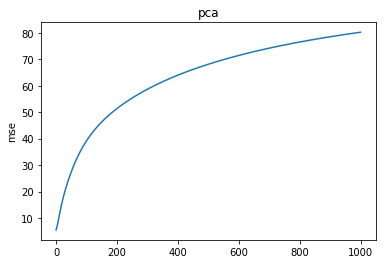

In [194]:
plt.plot(np.arange(1000), mse_pca3)
plt.title('pca')
plt.ylabel('mse')
plt.show()

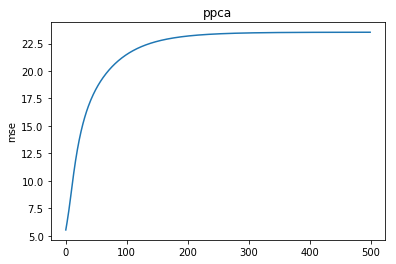

In [195]:
plt.plot(np.arange(500), mse_ppca3)
plt.title('ppca')
plt.ylabel('mse')
plt.show()

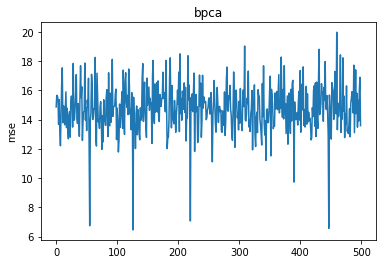

In [196]:
plt.plot(np.arange(500), mse_bpca3)
plt.title('bpca')
plt.ylabel('mse')
plt.show()